In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import os
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [20]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "liver2.csv")
df = pd.read_csv(data_path)

In [24]:
df = df.dropna()
limit = 480
df=df[df['Actual Room Duration']<limit]

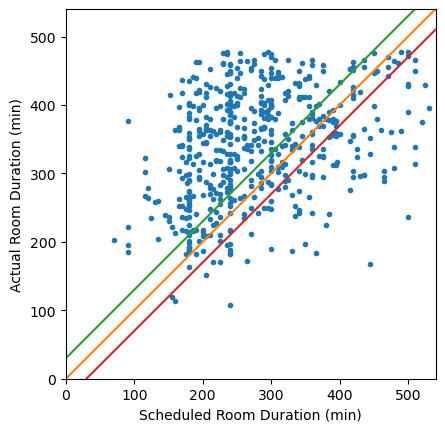

In [26]:
plt.plot(df['Scheduled Room Duration'],df['Actual Room Duration'],'.')
plt.gca().set_aspect('equal')
plt.plot((0, 1000), (0, 1000))
plt.plot((0, 1000), (30, 1030))
plt.plot((0, 1000), (-30, 970))
plt.xlim(0, limit+60)
plt.ylim(0, limit+60)
plt.xlabel('Scheduled Room Duration (min)')
plt.ylabel('Actual Room Duration (min)')
plt.show()

Text(0.5, 0, 'Age (years)')

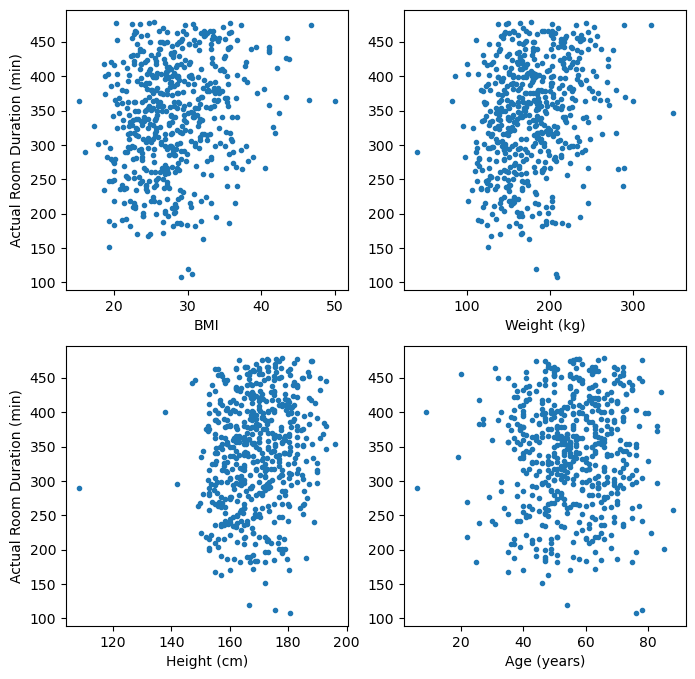

In [27]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0,0].plot(df['BMI'],df['Actual Room Duration'],'.')
axs[0,0].set_xlabel('BMI')
axs[0,0].set_ylabel('Actual Room Duration (min)')
axs[0,1].plot(df['Weight (kg)'],df['Actual Room Duration'],'.')
axs[0,1].set_xlabel('Weight (kg)')
axs[1,0].plot(df['Height (cm)'],df['Actual Room Duration'],'.')
axs[1,0].set_xlabel('Height (cm)')
axs[1,0].set_ylabel('Actual Room Duration (min)')
axs[1,1].plot(df['Age at Surgery'],df['Actual Room Duration'],'.')
axs[1,1].set_xlabel('Age (years)')

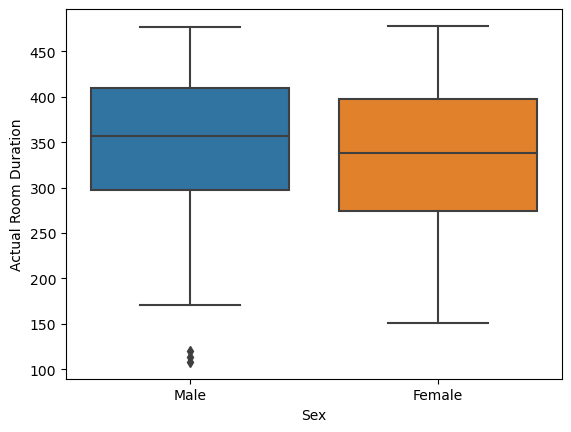

In [28]:
sb.boxplot( x = 'Sex',y = 'Actual Room Duration', data = df )

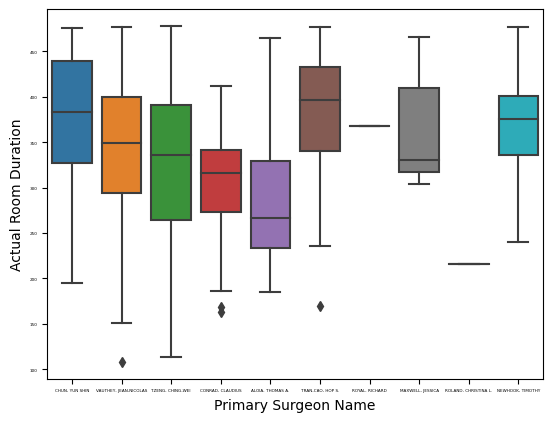

In [29]:
b = sb.boxplot( x = 'Primary Surgeon Name',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=3)

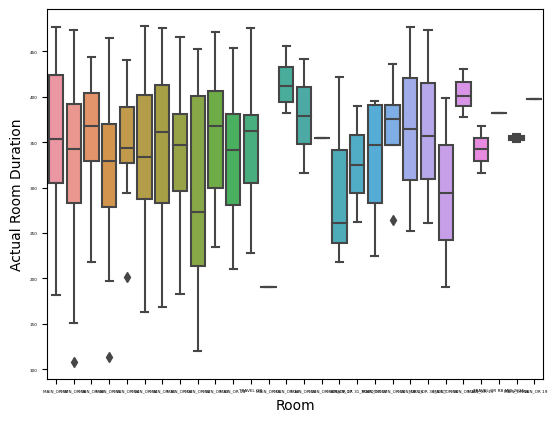

In [30]:
b = sb.boxplot(x = 'Room',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=3)

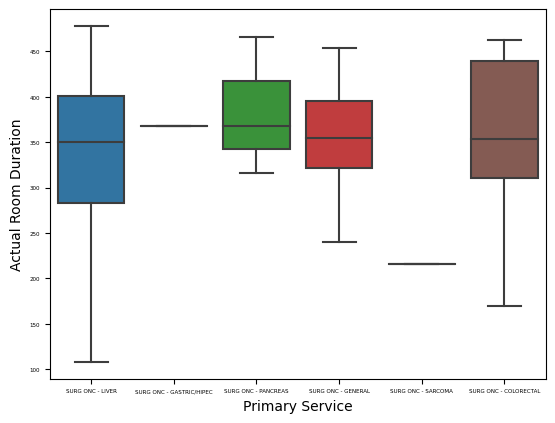

In [31]:
b = sb.boxplot(x = 'Primary Service',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=4)

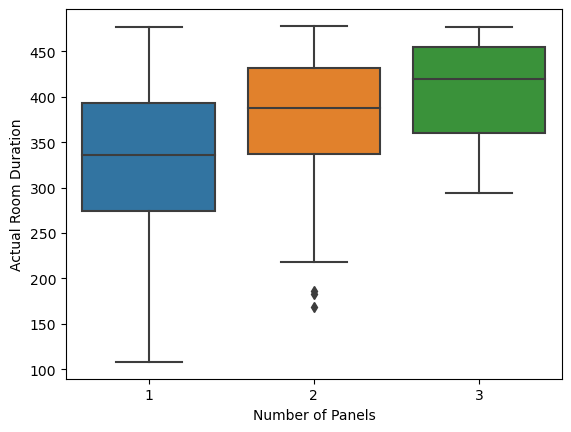

In [32]:
b = sb.boxplot(x = 'Number of Panels',y = 'Actual Room Duration', data = df )

In [33]:
features_to_encode = ['Primary Surgeon Name', 'Primary Service', 'Sex', 'Room']
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [34]:
X = df[['Primary Surgeon Name', 'Primary Service', 'Sex','Room','Number of Panels','Scheduled Room Duration', 'BMI', 'Age at Surgery', 'Height (cm)','Weight (kg)']]
y = df['Actual Room Duration']

In [35]:
# model = LinearRegression()
model = GradientBoostingRegressor()
pipe = make_pipeline(col_trans, model)
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Primary Surgeon Name',
                                                   'Primary Service', 'Sex',
                                                   'Room'])],
                                   verbose=...
  

In [36]:
y_pred = pipe.predict(X)

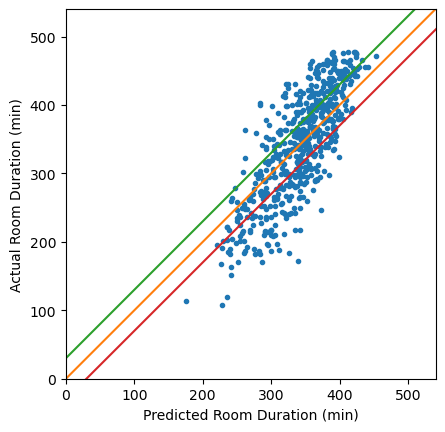

In [37]:
plt.plot(y_pred,y,'.')
plt.gca().set_aspect('equal')
plt.plot((0, 1000), (0, 1000))
plt.plot((0, 1000), (30, 1030))
plt.plot((0, 1000), (-30, 970))
plt.xlim(0, limit+60)
plt.ylim(0, limit+60)
plt.xlabel('Predicted Room Duration (min)')
plt.ylabel('Actual Room Duration (min)')
plt.show()

In [38]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X, features_to_encode)

In [39]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X, features_to_encode)

In [41]:
feature_importances = list(zip(X_train_encoded, model.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: Scheduled Room Duration             Importance: 0.28727779450055085
Feature: Weight (kg)                         Importance: 0.17546442615386018
Feature: BMI                                 Importance: 0.11396500570840055
Feature: Age at Surgery                      Importance: 0.10677360988622077
Feature: Height (cm)                         Importance: 0.08459283648249488
Feature: Number of Panels                    Importance: 0.055915093762582156
Feature: Primary Surgeon Name_CHUN, YUN SHIN Importance: 0.02761749130498576
Feature: Primary Surgeon Name_TZENG, CHING-WEI Importance: 0.019437671838607545
Feature: Primary Surgeon Name_CONRAD, CLAUDIUS Importance: 0.019420677314717628
Feature: Primary Surgeon Name_TRAN-CAO, HOP S. Importance: 0.012529306926307233
Feature: Room_MAIN_OR 38                     Importance: 0.011854159428124114
Feature: Room_TRAVEL OR                      Importance: 0.009841238753497706
Feature: Room_MAIN_OR 03                     Importance: 0.00960

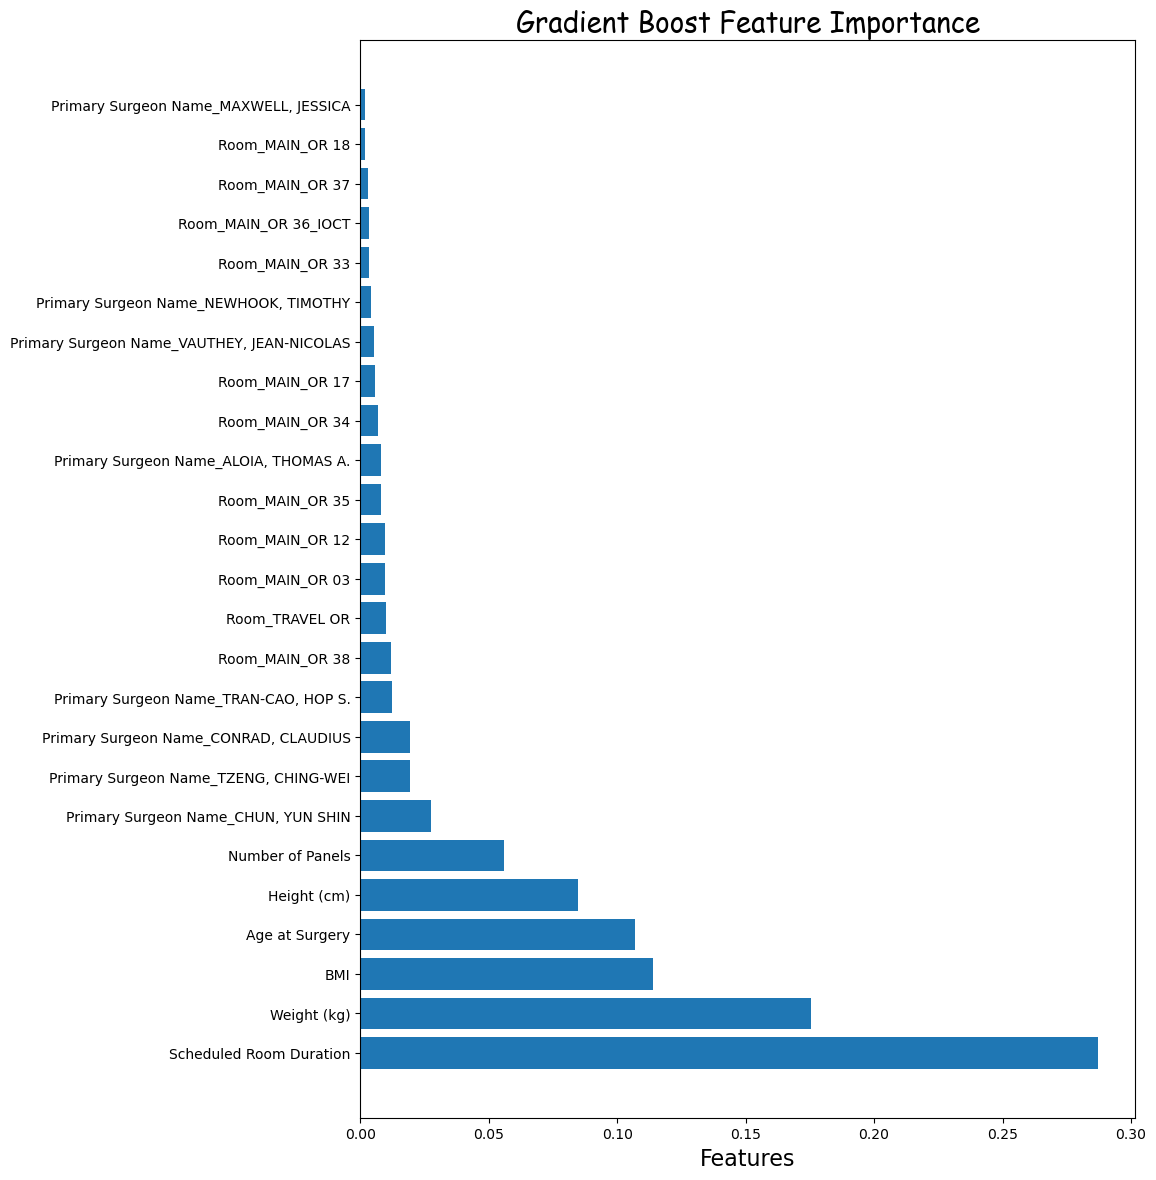

In [43]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Gradient Boost Feature Importance',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()